In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

import pandas as pd
import xarray as xr
from netCDF4 import Dataset, num2date, date2num
from datetime import datetime, timedelta
import os

import seaborn as sns
import cmocean as cmocn

%matplotlib inline

In [36]:
ds= xr.open_dataset('/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/Buoy/extractedGZ/WINDS/T_00N_140W_xrr_MatchUp_2000.nc')
ds

<xarray.Dataset>
Dimensions:                           (QS_TIME: 5640, cross_track: 3,
                                       ambiguities: 4, TIME: 6606,
                                       TAO_TIME_INDEX: 25, HEIGHT: 3, DEPTH: 1)
Coordinates:
  * QS_TIME                           (QS_TIME) datetime64[ns] 2000-01-03T03:...
  * cross_track                       (cross_track) int64 0 1 2
  * ambiguities                       (ambiguities) int64 0 1 2 3
  * TIME                              (TIME) datetime64[ns] 2000-01-03T03:04:...
  * TAO_TIME_INDEX                    (TAO_TIME_INDEX) int64 -12 -11 ... 11 12
  * HEIGHT                            (HEIGHT) float32 3.0 4.0 10.0
  * DEPTH                             (DEPTH) float32 1.0
Data variables: (12/363)
    retrieved_wind_speed              (QS_TIME, cross_track) float64 ...
    retrieved_wind_direction          (QS_TIME, cross_track) float64 ...
    rain_impact                       (QS_TIME, cross_track) float64 ...
    flags                             (QS_TIME, cross_track) float64 ...
    eflags                            (QS_TIME, cross_track) float64 ...
    nudge_wind_speed                  (QS_TIME, cross_track) float64 ...
    ...                                ...
    mean WDIR 240min                  (QS_TIME) float64 ...
    std. dev. WDIR 240min             (QS_TIME) float64 ...
    mean cosWDIR 240min               (QS_TIME) float64 ...
    std. dev. cosWDIR 240min          (QS_TIME) float64 ...
    mean sinWDIR 240min               (QS_TIME) float64 ...
    std. dev. sinWDIR 240min          (QS_TIME) float64 ...

In [48]:
WSPD_QS = ds['retrieved_wind_speed'].isel(cross_track = 0)
WDIR_QS = ds['retrieved_wind_direction'].isel(cross_track = 0)

WSPD_TAO = ds['WSPD_10N'].sel(HEIGHT=10)
WDIR_TAO = ds['WDIR'].sel(HEIGHT=4)

In [49]:
speed_diff = WSPD_QS - WSPD_TAO
speed_diff = np.abs(speed_diff)

dir_diff = WDIR_QS - WDIR_TAO
dir_diff = (np.abs(dir_diff)+360)%360

In [50]:
speed_diff_mean = speed_diff.mean(dim='QS_TIME', skipna = True)
speed_diff_std = speed_diff.std(dim='QS_TIME', skipna = True)

dir_diff_mean = dir_diff.mean(dim='QS_TIME', skipna = True)
dir_diff_std = dir_diff.std(dim='QS_TIME', skipna = True)

Text(0, 0.5, 'Average Direction Difference from QuikSCAT [degrees]')

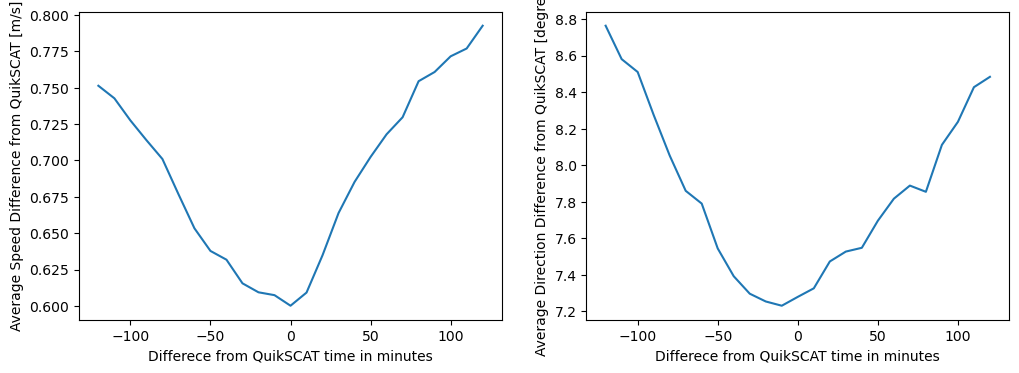

In [57]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
ax[0].plot(np.arange(-12,13)* 10, speed_diff_mean)
ax[0].set_xlabel('Differece from QuikSCAT time in minutes')
ax[0].set_ylabel('Average Speed Difference from QuikSCAT [m/s]')

ax[1].plot(np.arange(-12,13)* 10, dir_diff_mean)
ax[1].set_xlabel('Differece from QuikSCAT time in minutes')
ax[1].set_ylabel('Average Direction Difference from QuikSCAT [degrees]')

Text(0, 0.5, 'Direction Difference from QuikSCAT [degrees]')

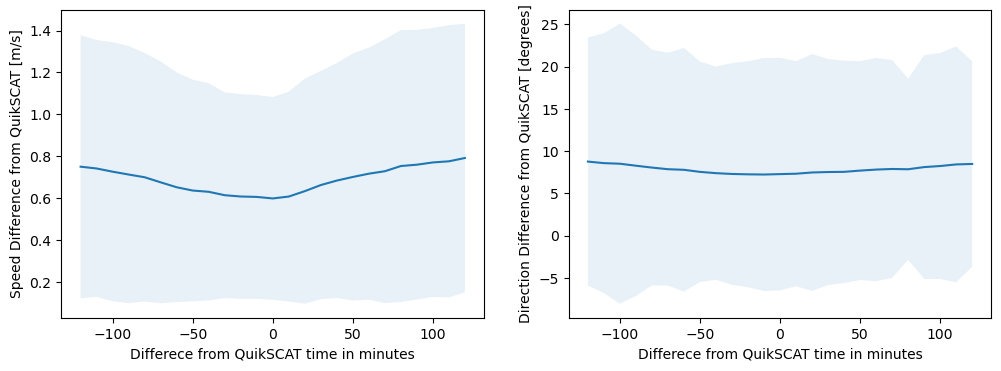

In [58]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4))
ax[0].plot(np.arange(-12,13)* 10, speed_diff_mean)
ax[0].fill_between(np.arange(-12,13)* 10, speed_diff_mean- speed_diff_std, speed_diff_mean + speed_diff_std, alpha=0.1)
ax[0].set_xlabel('Differece from QuikSCAT time in minutes')
ax[0].set_ylabel('Speed Difference from QuikSCAT [m/s]')

ax[1].plot(np.arange(-12,13)* 10, dir_diff_mean)
ax[1].fill_between(np.arange(-12,13)* 10, dir_diff_mean- dir_diff_std, dir_diff_mean + dir_diff_std, alpha=0.1)
ax[1].set_xlabel('Differece from QuikSCAT time in minutes')
ax[1].set_ylabel('Direction Difference from QuikSCAT [degrees]')